> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

I choose No-show appointments because it is an interesting topic to find out the reason why people book an appointment then they do not show up.
I want to investgate the reason wheather the age, sms, gender or neighbourhood. First I will upload the file and clean it. Then I will start investgating the reasons.

In [1]:
# import all needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
df = pd.read_csv('KaggleV2-May-2016.csv')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


According to the file, I have 14 column and no null value, so I will investegate more to check if I have invalid entry or all valid. Howrver, ScheduledDay and AppointmentDay are object, so it need to be changed to datetime and I might changed some value from integer to object to help me analize better such as sms and scholarship.

In [3]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


First I want to check that AppointmentID is unique and not doublicate, because one Patient can have more than appointment.

In [4]:
df.loc[:, ['PatientId', 'AppointmentID']].nunique()

PatientId         62299
AppointmentID    110527
dtype: int64

In [5]:
df.loc[:, ['Neighbourhood']].nunique()

Neighbourhood    81
dtype: int64

Since now I confirm that the AppointmentID in unique, I will use the .describe() to binary the numric fields to help me with my calculation and observation.

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


from the table above, the average age is 37%, and about 10% covered with Brasilian welfare program. I see the min age is -1 and the max age is 115 I think the -1 is invalid entry and I need ti investgate about it.

In [7]:
df[df.Age == 0]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
89,4.314932e+14,5640380,M,2016-04-29T10:37:02Z,2016-04-29T00:00:00Z,0,MONTE BELO,0,0,0,0,0,0,No
101,6.822847e+13,5642813,M,2016-04-29T17:24:19Z,2016-04-29T00:00:00Z,0,BONFIM,0,0,0,0,0,0,No
104,3.326985e+12,5632495,F,2016-04-28T08:04:48Z,2016-04-29T00:00:00Z,0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
132,8.468587e+14,5560742,M,2016-04-08T09:29:23Z,2016-04-29T00:00:00Z,0,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
150,5.392419e+10,5641476,M,2016-04-29T13:43:34Z,2016-04-29T00:00:00Z,0,ITARARÉ,0,0,0,0,0,0,No


In [8]:
df[df.Age < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


I found out that 3539 rows with age 0 and one with age -1. I'm assuming that the age -1 is invalid entry so I will drop it, and the ages 0 I'm asuming that they are baby born with age less than year so I will includ it Since it is a valid entry.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


The first think I will do is that take a copy of the data. Then converting appoitment to datetime. Then I will change the value of ScheduledDay to the day of the week. Then drop the row with invalid entry. Then change the name of a couble of columns. Then I will create three columns one for grouping the age and the second for people who have genetic diseases then I will change the no-show to showed_up and I will convert the value from no to yes and vice versa. Lastly, I will rename the scholarship to insurance

In [9]:
df_copy = df.copy()

In [10]:
df_copy.AppointmentDay = df_copy.AppointmentDay.apply(np.datetime64)
df_copy['Time'] = df_copy['ScheduledDay'].apply(lambda x: x.split("T")[1]).astype(dt.time)


day = lambda dt: dt.weekday_name
df_copy['ScheduledDay'] = df_copy.AppointmentDay.apply(day)
df_copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  """


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Time
0,2.987250e+13,5642903,F,Friday,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08Z
1,5.589978e+14,5642503,M,Friday,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27Z
2,4.262962e+12,5642549,F,Friday,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04Z
3,8.679512e+11,5642828,F,Friday,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31Z
4,8.841186e+12,5642494,F,Friday,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23Z
5,9.598513e+13,5626772,F,Friday,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,08:36:51Z
6,7.336882e+14,5630279,F,Friday,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,15:05:12Z
7,3.449833e+12,5630575,F,Friday,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,15:39:58Z
8,5.639473e+13,5638447,F,Friday,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,08:02:16Z
9,7.812456e+13,5629123,F,Friday,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,12:48:25Z


In [11]:
df_copy.rename(columns={'Hipertension':'Hypertension', 'No-show':'Showed_up', 'Scholarship': 'insurance', 
                        'AppointmentDay': 'AppointmentDate'}, inplace=True)
df_copy

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDate,Age,Neighbourhood,insurance,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Time
0,2.987250e+13,5642903,F,Friday,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08Z
1,5.589978e+14,5642503,M,Friday,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27Z
2,4.262962e+12,5642549,F,Friday,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04Z
3,8.679512e+11,5642828,F,Friday,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31Z
4,8.841186e+12,5642494,F,Friday,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23Z
5,9.598513e+13,5626772,F,Friday,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,08:36:51Z
6,7.336882e+14,5630279,F,Friday,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,15:05:12Z
7,3.449833e+12,5630575,F,Friday,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,15:39:58Z
8,5.639473e+13,5638447,F,Friday,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,08:02:16Z
9,7.812456e+13,5629123,F,Friday,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,12:48:25Z


In [12]:
df_copy.drop(df.query('Age < 0').index, inplace=True)
df_copy

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDate,Age,Neighbourhood,insurance,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Time
0,2.987250e+13,5642903,F,Friday,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08Z
1,5.589978e+14,5642503,M,Friday,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27Z
2,4.262962e+12,5642549,F,Friday,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04Z
3,8.679512e+11,5642828,F,Friday,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31Z
4,8.841186e+12,5642494,F,Friday,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23Z
5,9.598513e+13,5626772,F,Friday,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,08:36:51Z
6,7.336882e+14,5630279,F,Friday,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,15:05:12Z
7,3.449833e+12,5630575,F,Friday,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,15:39:58Z
8,5.639473e+13,5638447,F,Friday,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,08:02:16Z
9,7.812456e+13,5629123,F,Friday,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,12:48:25Z


In [13]:
df_copy['Showed_up'].replace(to_replace = 'No', value = "present", inplace = True)
df_copy['Showed_up'].replace(to_replace = 'Yes', value = "absent", inplace = True)
df_copy

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDate,Age,Neighbourhood,insurance,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Time
0,2.987250e+13,5642903,F,Friday,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,present,18:38:08Z
1,5.589978e+14,5642503,M,Friday,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,present,16:08:27Z
2,4.262962e+12,5642549,F,Friday,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,present,16:19:04Z
3,8.679512e+11,5642828,F,Friday,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,present,17:29:31Z
4,8.841186e+12,5642494,F,Friday,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,present,16:07:23Z
5,9.598513e+13,5626772,F,Friday,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,present,08:36:51Z
6,7.336882e+14,5630279,F,Friday,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,absent,15:05:12Z
7,3.449833e+12,5630575,F,Friday,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,absent,15:39:58Z
8,5.639473e+13,5638447,F,Friday,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,present,08:02:16Z
9,7.812456e+13,5629123,F,Friday,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,present,12:48:25Z


In [14]:
df_copy['Showed_up'].replace(to_replace = 'present', value = "Yes", inplace = True)
df_copy['Showed_up'].replace(to_replace = 'absent', value = "No", inplace = True)
df_copy

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDate,Age,Neighbourhood,insurance,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Time
0,2.987250e+13,5642903,F,Friday,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,18:38:08Z
1,5.589978e+14,5642503,M,Friday,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,16:08:27Z
2,4.262962e+12,5642549,F,Friday,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,16:19:04Z
3,8.679512e+11,5642828,F,Friday,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,17:29:31Z
4,8.841186e+12,5642494,F,Friday,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,16:07:23Z
5,9.598513e+13,5626772,F,Friday,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,Yes,08:36:51Z
6,7.336882e+14,5630279,F,Friday,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,No,15:05:12Z
7,3.449833e+12,5630575,F,Friday,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,No,15:39:58Z
8,5.639473e+13,5638447,F,Friday,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,Yes,08:02:16Z
9,7.812456e+13,5629123,F,Friday,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,Yes,12:48:25Z


In [15]:
group_age = pd.Series(['0-14', '15-30', '31-45', '46-60', '>61'])

df_copy['Age_group'] = pd.cut(df_copy['Age'], bins=[0,14,30,45,60,115], labels=group_age)

df_copy

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDate,Age,Neighbourhood,insurance,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Time,Age_group
0,2.987250e+13,5642903,F,Friday,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,18:38:08Z,>61
1,5.589978e+14,5642503,M,Friday,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,16:08:27Z,46-60
2,4.262962e+12,5642549,F,Friday,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,16:19:04Z,>61
3,8.679512e+11,5642828,F,Friday,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,17:29:31Z,0-14
4,8.841186e+12,5642494,F,Friday,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,16:07:23Z,46-60
5,9.598513e+13,5626772,F,Friday,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,Yes,08:36:51Z,>61
6,7.336882e+14,5630279,F,Friday,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,No,15:05:12Z,15-30
7,3.449833e+12,5630575,F,Friday,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,No,15:39:58Z,31-45
8,5.639473e+13,5638447,F,Friday,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,Yes,08:02:16Z,15-30
9,7.812456e+13,5629123,F,Friday,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,Yes,12:48:25Z,15-30


In [16]:
df_copy['Genetic_diseases'] = df_copy[["Hypertension", "Diabetes"]].max(axis=1).replace()

df_copy['Genetic_diseases'].replace(to_replace = 1, value = "Yes", inplace = True)
df_copy['Genetic_diseases'].replace(to_replace = 0, value = "No", inplace = True)


df_copy

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDate,Age,Neighbourhood,insurance,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Time,Age_group,Genetic_diseases
0,2.987250e+13,5642903,F,Friday,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,18:38:08Z,>61,Yes
1,5.589978e+14,5642503,M,Friday,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,16:08:27Z,46-60,No
2,4.262962e+12,5642549,F,Friday,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,16:19:04Z,>61,No
3,8.679512e+11,5642828,F,Friday,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,17:29:31Z,0-14,No
4,8.841186e+12,5642494,F,Friday,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,16:07:23Z,46-60,Yes
5,9.598513e+13,5626772,F,Friday,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,Yes,08:36:51Z,>61,Yes
6,7.336882e+14,5630279,F,Friday,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,No,15:05:12Z,15-30,No
7,3.449833e+12,5630575,F,Friday,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,No,15:39:58Z,31-45,No
8,5.639473e+13,5638447,F,Friday,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,Yes,08:02:16Z,15-30,No
9,7.812456e+13,5629123,F,Friday,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,Yes,12:48:25Z,15-30,No


Now I will change the value of sms received to yes and no and the same for alcoholism & insurance. Then the handcap has 4 values, so I will change it to eather yes and no

In [17]:
df_copy['SMS_received'].replace(to_replace = 0, value = "No", inplace = True)
df_copy['SMS_received'].replace(to_replace = 1, value = "Yes", inplace = True)
df_copy

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDate,Age,Neighbourhood,insurance,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Time,Age_group,Genetic_diseases
0,2.987250e+13,5642903,F,Friday,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,No,Yes,18:38:08Z,>61,Yes
1,5.589978e+14,5642503,M,Friday,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,No,Yes,16:08:27Z,46-60,No
2,4.262962e+12,5642549,F,Friday,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,No,Yes,16:19:04Z,>61,No
3,8.679512e+11,5642828,F,Friday,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,No,Yes,17:29:31Z,0-14,No
4,8.841186e+12,5642494,F,Friday,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,No,Yes,16:07:23Z,46-60,Yes
5,9.598513e+13,5626772,F,Friday,2016-04-29,76,REPÚBLICA,0,1,0,0,0,No,Yes,08:36:51Z,>61,Yes
6,7.336882e+14,5630279,F,Friday,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,No,No,15:05:12Z,15-30,No
7,3.449833e+12,5630575,F,Friday,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,No,No,15:39:58Z,31-45,No
8,5.639473e+13,5638447,F,Friday,2016-04-29,21,ANDORINHAS,0,0,0,0,0,No,Yes,08:02:16Z,15-30,No
9,7.812456e+13,5629123,F,Friday,2016-04-29,19,CONQUISTA,0,0,0,0,0,No,Yes,12:48:25Z,15-30,No


In [18]:
df_copy['Alcoholism'].replace(to_replace = 0, value = "No", inplace = True)
df_copy['Alcoholism'].replace(to_replace = 1, value = "Yes", inplace = True)
df_copy

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDate,Age,Neighbourhood,insurance,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Time,Age_group,Genetic_diseases
0,2.987250e+13,5642903,F,Friday,2016-04-29,62,JARDIM DA PENHA,0,1,0,No,0,No,Yes,18:38:08Z,>61,Yes
1,5.589978e+14,5642503,M,Friday,2016-04-29,56,JARDIM DA PENHA,0,0,0,No,0,No,Yes,16:08:27Z,46-60,No
2,4.262962e+12,5642549,F,Friday,2016-04-29,62,MATA DA PRAIA,0,0,0,No,0,No,Yes,16:19:04Z,>61,No
3,8.679512e+11,5642828,F,Friday,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,No,0,No,Yes,17:29:31Z,0-14,No
4,8.841186e+12,5642494,F,Friday,2016-04-29,56,JARDIM DA PENHA,0,1,1,No,0,No,Yes,16:07:23Z,46-60,Yes
5,9.598513e+13,5626772,F,Friday,2016-04-29,76,REPÚBLICA,0,1,0,No,0,No,Yes,08:36:51Z,>61,Yes
6,7.336882e+14,5630279,F,Friday,2016-04-29,23,GOIABEIRAS,0,0,0,No,0,No,No,15:05:12Z,15-30,No
7,3.449833e+12,5630575,F,Friday,2016-04-29,39,GOIABEIRAS,0,0,0,No,0,No,No,15:39:58Z,31-45,No
8,5.639473e+13,5638447,F,Friday,2016-04-29,21,ANDORINHAS,0,0,0,No,0,No,Yes,08:02:16Z,15-30,No
9,7.812456e+13,5629123,F,Friday,2016-04-29,19,CONQUISTA,0,0,0,No,0,No,Yes,12:48:25Z,15-30,No


In [19]:
df_copy['insurance'].replace(to_replace = 0, value = "No", inplace = True)
df_copy['insurance'].replace(to_replace = 1, value = "Yes", inplace = True)
df_copy

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDate,Age,Neighbourhood,insurance,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Time,Age_group,Genetic_diseases
0,2.987250e+13,5642903,F,Friday,2016-04-29,62,JARDIM DA PENHA,No,1,0,No,0,No,Yes,18:38:08Z,>61,Yes
1,5.589978e+14,5642503,M,Friday,2016-04-29,56,JARDIM DA PENHA,No,0,0,No,0,No,Yes,16:08:27Z,46-60,No
2,4.262962e+12,5642549,F,Friday,2016-04-29,62,MATA DA PRAIA,No,0,0,No,0,No,Yes,16:19:04Z,>61,No
3,8.679512e+11,5642828,F,Friday,2016-04-29,8,PONTAL DE CAMBURI,No,0,0,No,0,No,Yes,17:29:31Z,0-14,No
4,8.841186e+12,5642494,F,Friday,2016-04-29,56,JARDIM DA PENHA,No,1,1,No,0,No,Yes,16:07:23Z,46-60,Yes
5,9.598513e+13,5626772,F,Friday,2016-04-29,76,REPÚBLICA,No,1,0,No,0,No,Yes,08:36:51Z,>61,Yes
6,7.336882e+14,5630279,F,Friday,2016-04-29,23,GOIABEIRAS,No,0,0,No,0,No,No,15:05:12Z,15-30,No
7,3.449833e+12,5630575,F,Friday,2016-04-29,39,GOIABEIRAS,No,0,0,No,0,No,No,15:39:58Z,31-45,No
8,5.639473e+13,5638447,F,Friday,2016-04-29,21,ANDORINHAS,No,0,0,No,0,No,Yes,08:02:16Z,15-30,No
9,7.812456e+13,5629123,F,Friday,2016-04-29,19,CONQUISTA,No,0,0,No,0,No,Yes,12:48:25Z,15-30,No


In [20]:
df_copy['Handcap'].replace(to_replace = 0, value = "No", inplace = True)
df_copy['Handcap'].replace(to_replace = 1, value = "Yes",  inplace = True)
df_copy['Handcap'].replace(to_replace = 2, value = "Yes",  inplace = True)
df_copy['Handcap'].replace(to_replace = 3, value = "Yes",  inplace = True)
df_copy['Handcap'].replace(to_replace = 4, value = "Yes",  inplace = True)
df_copy

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDate,Age,Neighbourhood,insurance,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Time,Age_group,Genetic_diseases
0,2.987250e+13,5642903,F,Friday,2016-04-29,62,JARDIM DA PENHA,No,1,0,No,No,No,Yes,18:38:08Z,>61,Yes
1,5.589978e+14,5642503,M,Friday,2016-04-29,56,JARDIM DA PENHA,No,0,0,No,No,No,Yes,16:08:27Z,46-60,No
2,4.262962e+12,5642549,F,Friday,2016-04-29,62,MATA DA PRAIA,No,0,0,No,No,No,Yes,16:19:04Z,>61,No
3,8.679512e+11,5642828,F,Friday,2016-04-29,8,PONTAL DE CAMBURI,No,0,0,No,No,No,Yes,17:29:31Z,0-14,No
4,8.841186e+12,5642494,F,Friday,2016-04-29,56,JARDIM DA PENHA,No,1,1,No,No,No,Yes,16:07:23Z,46-60,Yes
5,9.598513e+13,5626772,F,Friday,2016-04-29,76,REPÚBLICA,No,1,0,No,No,No,Yes,08:36:51Z,>61,Yes
6,7.336882e+14,5630279,F,Friday,2016-04-29,23,GOIABEIRAS,No,0,0,No,No,No,No,15:05:12Z,15-30,No
7,3.449833e+12,5630575,F,Friday,2016-04-29,39,GOIABEIRAS,No,0,0,No,No,No,No,15:39:58Z,31-45,No
8,5.639473e+13,5638447,F,Friday,2016-04-29,21,ANDORINHAS,No,0,0,No,No,No,Yes,08:02:16Z,15-30,No
9,7.812456e+13,5629123,F,Friday,2016-04-29,19,CONQUISTA,No,0,0,No,No,No,Yes,12:48:25Z,15-30,No


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

Now since the data now is cleaned and ready to investgate, I want first to investgate the majority. Then I will investgate the reason for people who did not showed up. First I will see the percentage of the people who showed up and who doesn't

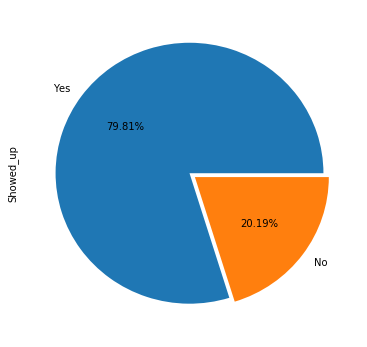

In [21]:
df_copy.Showed_up.value_counts().plot.pie(figsize=(6,6), autopct='%.2f%%', explode=(0, .05))
plt.show()

According to the graph I have 20.19% who did not showed up and this is where I am goint to focus analyzing and finding the reasons.

First, what the percentage of people who have a geneti diseases such as hypertension and diabetes and what the percentage of them who missed their appoitment.

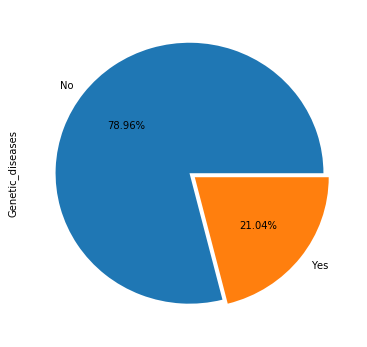

In [22]:
df_copy.Genetic_diseases.value_counts().plot.pie(figsize=(6,6), autopct='%.2f%%', explode=(0, .05))
plt.show()

In [23]:
crosstab_1 = pd.crosstab(df_copy["Genetic_diseases"], df_copy["Showed_up"])
crosstab_1

Showed_up,No,Yes
Genetic_diseases,,
No,18258,69010
Yes,4061,19197


there is 21.04% who have genetic disease and 17% of them missed their appoitment.
Now I want to know the majority is it male or female and the percentage of them who missed their appoitment?

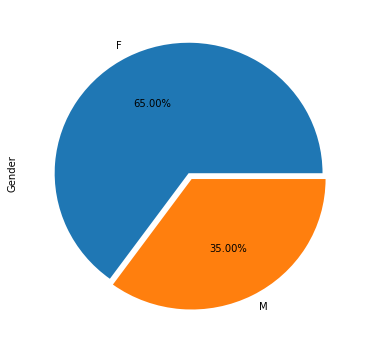

In [24]:
df_copy.Gender.value_counts().plot.pie(figsize=(6,6), autopct='%.2f%%', explode=(0, .05))
plt.show()

In [25]:
crosstab_2 = pd.crosstab(df_copy["Gender"], df_copy["Showed_up"])
crosstab_2

Showed_up,No,Yes
Gender,,
F,14594,57245
M,7725,30962


Female has booked 71,839 appoitments, however, 20% did not showed up.
Male has booked 38,687 appoitments, however, almost 20% did not showed up, so they almost the same when it comes to not show up. Now I want to know the percentage of people who received an sms remider and missed the appoitment?

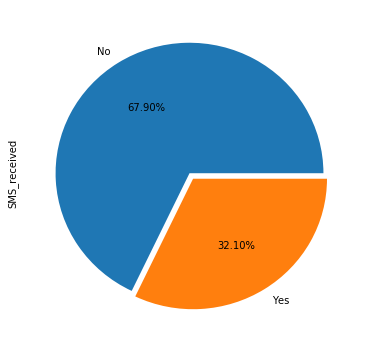

In [26]:
df_copy.SMS_received.value_counts().plot.pie(figsize=(6,6), autopct='%.2f%%', explode=(0, .05))
plt.show()

In [27]:
crosstab_3 = pd.crosstab(df_copy["SMS_received"], df_copy["Showed_up"])
crosstab_3

Showed_up,No,Yes
SMS_received,,
No,12535,62509
Yes,9784,25698


there is only 32.10% of the people who recieved a SMS remider, However, almost 27.5% did not showed up even though they have received an sms remider. Now I want to check the percentage of people who is handcap and the percentage of them who did not showed up?

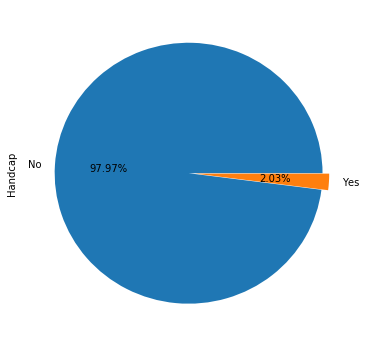

In [28]:
df_copy.Handcap.value_counts().plot.pie(figsize=(6,6), autopct='%.2f%%', explode=(0, .05))
plt.show()

In [29]:
crosstab_4 = pd.crosstab(df_copy["Handcap"], df_copy["Showed_up"])
crosstab_4

Showed_up,No,Yes
Handcap,,
No,21912,86373
Yes,407,1834


only 2.03% of the people who Handcao; however, 18% of them did not showed up. Now I want to check the percentage of them who are alcoholic and missed their appoitment?

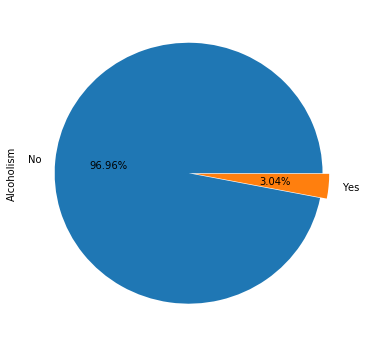

In [30]:
df_copy.Alcoholism.value_counts().plot.pie(figsize=(6,6), autopct='%.2f%%', explode=(0, .05))
plt.show()

In [31]:
crosstab_5 = pd.crosstab(df_copy["Alcoholism"], df_copy["Showed_up"])
crosstab_5

Showed_up,No,Yes
Alcoholism,,
No,21642,85524
Yes,677,2683


There is 3.04% who alcoholic, and 20% of them did not showed up. Now I want to see the percentage of people who have insurance and did not showed up?

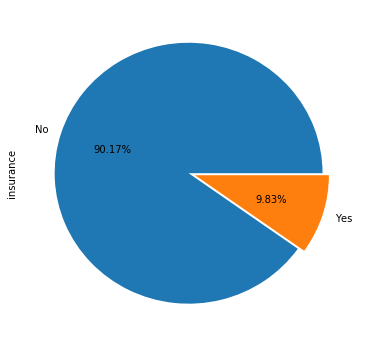

In [32]:
df_copy.insurance.value_counts().plot.pie(figsize=(6,6), autopct='%.2f%%', explode=(0, .05))
plt.show()

In [33]:
crosstab_6 = pd.crosstab(df_copy["insurance"], df_copy["Showed_up"])
crosstab_6

Showed_up,No,Yes
insurance,,
No,19741,79924
Yes,2578,8283


There is only 9.83% of the people who have insurance, however, almost 24% of them did not showed up. What the highest day with appoitment and what the percentage of the missing appoitment of each day

In [34]:
crosstab_7 = pd.crosstab(df_copy["ScheduledDay"], df_copy["Showed_up"])
crosstab_7

Showed_up,No,Yes
ScheduledDay,,
Friday,4037,14982
Monday,4690,18024
Saturday,9,30
Thursday,3338,13909
Tuesday,5152,20488
Wednesday,5093,20774


the highiest day with appoitments is Wednesday with 25,867, however, almost 19% did not showed up.
Tuesday the second highiest with 25,640, however, 20% did not showed up.
Then Monday with 22,714 appoitment, however, 20.6% did not showed up.
Friday with 19,019 appoitments, however, 21% did not showed up.
Thursday with 17,247 appoitments, however, 19% did not showd up.
Saturday only 39 appoitments, however, 23% did not showed up
Sunday 0 appoitments.

In [35]:
crosstab_8 = pd.crosstab(df_copy["Age_group"], df_copy["Showed_up"])
crosstab_8

Showed_up,No,Yes
Age_group,,
0-14,4287,15431
15-30,5564,16810
31-45,4692,17262
46-60,4131,19048
>61,3006,16756


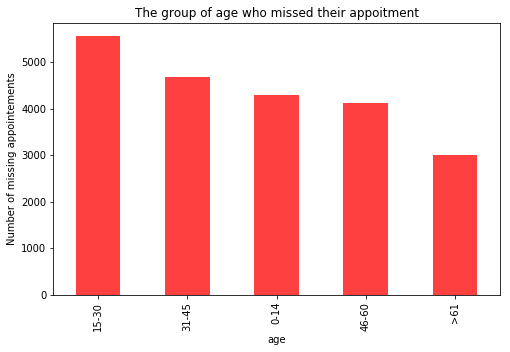

In [36]:
figure_1 = df_copy.query('Showed_up == "No"').groupby("Age_group")["AppointmentID"].count().sort_values(ascending=False)

figure_1.plot(kind='bar', color='red', title= 'The group of age who missed their appoitment', alpha =.75, figsize=(8,5))

# graph labels
plt.xlabel('age')
plt.ylabel('Number of missing appointements');

most of the appoitments were booked the range of 46-60 with 23,179 but 17.8% did not showed up.
Then the group 15-30 with 22,374 but almost 25% did not showed up.
Then the group 31-45 with 21,954 but 21% did not showed up.
Then the people who older than 61 with 19,762 but, 15% did not showed up.
Last the group 0-14 with 19,718 but 21.7% did not showed up.

Lastly, I want to check what hospital score more missing appoitment?

In [ ]:
figure_2 = df_copy.query('Showed_up == "No"').groupby("Neighbourhood")["AppointmentID"].count().sort_values(ascending=False)

figure_2.plot(kind='bar', color='red', title= 'What hospital score more missing appointment', alpha =.75, figsize=(17,10))

# graph labels
plt.xlabel('hospitals')
plt.ylabel('Number of missing appointements');

From the figure above, Lardim Camburi hospital is the most effected by missing appoitment with more than 14,000 missing appoitment.

### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In my conclusion, I have 110527 and 20.19% of it is missing appoitment. However, I have 62299 people and 65% are women and 35% are men, 21.04% of them are having generic diesease, 32.10% have received sms remider, only 2.03 are handcap, only 3.05% are alcoholic and 9.83% have insurance. In my analysis I focused on the missing appoitmrnt and I found that male and female are having almost the same percentage of missing appoitment, people with generic diesease are 21.04% but 17% of them have missied their appoitment, which is a big number, only 31.10% of the people have received a sms reminder and almost 27.5% of them have missed their appotment. Overall, I tried to analized this data by static and chart for better point of view. 

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])